In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import urllib.request
import json

import seaborn as sns
sns.set(color_codes=True)

In [3]:
f=sns.load_dataset('fmri')

In [4]:
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


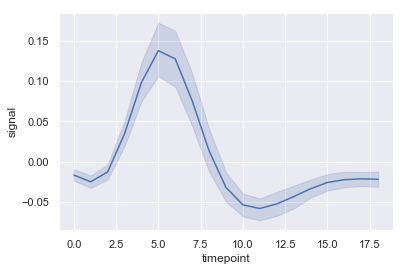

In [5]:
sns.lineplot('timepoint','signal',data=f)

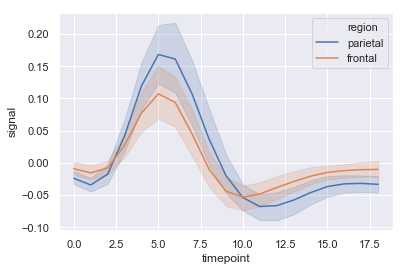

In [6]:
sns.lineplot('timepoint','signal',hue='region',data=f)

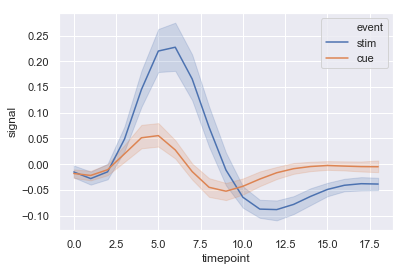

In [7]:
sns.lineplot('timepoint','signal',hue='event',data=f)

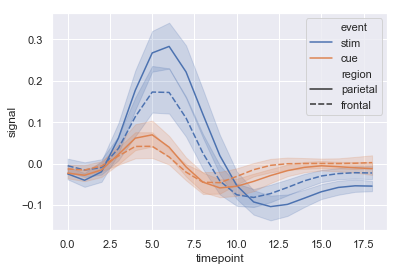

In [8]:
sns.lineplot('timepoint', 'signal', data=f, hue="event", style="region");

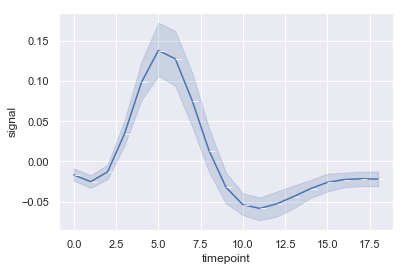

In [9]:
sns.lineplot('timepoint', 'signal', data=f, marker=True);

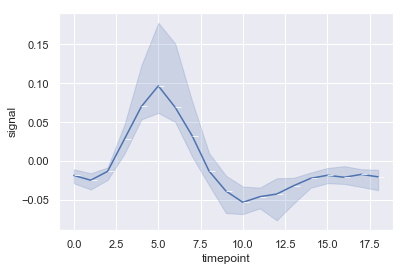

In [10]:
sns.lineplot('timepoint', 'signal', data=f, marker=True, estimator=np.median);

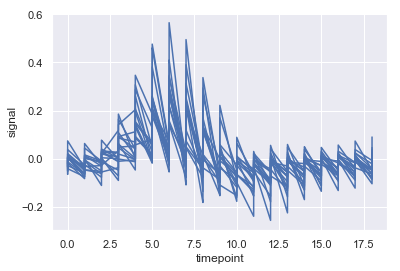

In [11]:
sns.lineplot('timepoint', 'signal', data=f, units='subject', estimator=None);

In [12]:
f_ = f[(f.region == "parietal") & (f.event == "cue")]

In [13]:
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


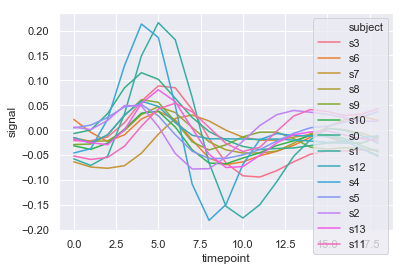

In [14]:
sns.lineplot('timepoint', 'signal', data=f_, hue='subject', estimator=None);

In [15]:
x = np.array([-3, -2, -1, 0, 1, 2, 3])

In [16]:
y=x*x

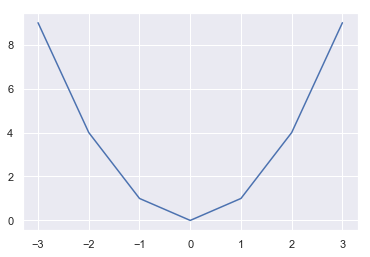

In [17]:
sns.lineplot(x,y)

In [19]:
with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date']) 
df.drop('tt', axis=1, inplace=True)
df.set_index('date', inplace=True)
df = df[df['status'] == 'Confirmed']
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric,errors='coerce')
df = df.rolling(7).mean()
df.reset_index(inplace=True)

In [20]:
df.head()

,date,an,ap,ar,as,br,ch,ct,dateymd,dd,...,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_ = pd.melt(df, id_vars="date", 
              value_vars = list(df.columns).remove("date"),
              var_name = "state", value_name = "confirmed")

In [22]:
df_.head()

,date,state,confirmed
0,2020-03-14,an,NaN
1,2020-03-15,an,NaN
2,2020-03-16,an,NaN
3,2020-03-17,an,NaN
4,2020-03-18,an,NaN


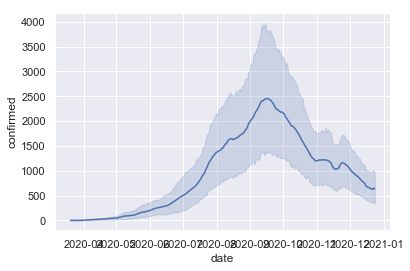

In [23]:
sns.lineplot('date', 'confirmed', data=df_);

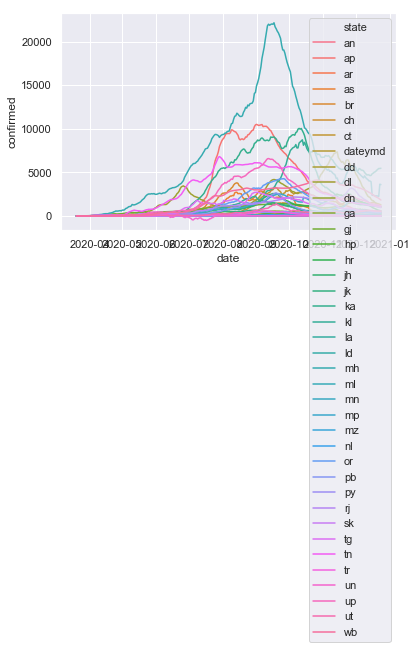

In [24]:
sns.lineplot('date', 'confirmed', hue="state", data=df_);

In [25]:
states = ['mh', 'tn', 'dl', 'wb', 'ka', 'gj']